# Using APIs to access LLMs

## Lab Objectives:

By the end of this lab, you should be able to:

- Access and authenticate with AI models hosted on GitHub or Azure endpoints.

- Use models like gpt-4o-mini, Codestral-2501, and DeepSeek-R1 via the OpenAI-compatible API.

- Automate code explanation, translation (e.g., Python to Java), debugging, and review using AI.

- Compare model outputs across different use cases.

## Prerequisites:

- Python 3.9+

- A GitHub account with a Personal Access Token (PAT)

- Installed Python openai package.

## Resources:

### Step 1:

Sign up for the Github Student Developer Pack: https://education.github.com/pack

Sign up for 2-months free access to ChatGPT Plus: https://chatgpt.com/students


### Step 2:

Generate personal access token: https://github.com/settings/personal-access-tokens


### Step 3: 

Head to Github Models page to start working with the models: https://github.com/marketplace/models
    

# <div style="border-radius:10px; border:#E75480 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:center">Hands-on Demo</div>

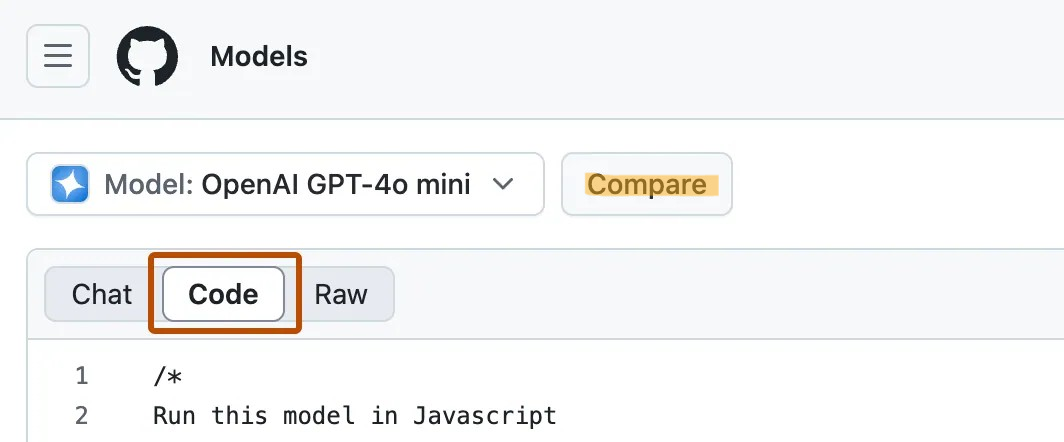

### Setup the Client

- Save your Github PAT in token.txt (make sure to add the file to .gitignore). 

    You can add it directly in the gitignore file or in the bash terminal type: echo "token.txt" >> .gitignore


- Run Python script to load the token and configure the client.


🛑 Security Notice: Keep Your Token Secret

⚠️ IMPORTANT: Your GitHub token is a key to your account. Never upload it to a public repo!

Why? If someone finds your token in a repo, they could:

- Use your GitHub account for malicious activity.

- Rack up usage charges.

- Access or delete your private data.



In [ ]:
# pip install openai
!pip3 install openai

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.4/644.4 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 35.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip


In [4]:
"""Run this model in Python

> pip install openai
"""
import os
from openai import OpenAI

# Create your PAT token by following instructions here: 
# https://docs.github.com/en/authentication/keeping-your-account-and-data-secure/managing-your-personal-access-tokens
# grab the token from the token.txt file
# with open("token.txt", "r") as f:
#     GITHUB_TOKEN = f.read().strip()

# Set it as an environment variable
os.environ["GITHUB_TOKEN"] = "X"


# To authenticate with the model you will need to generate a personal access token (PAT) in your GitHub settings. 
client = OpenAI(
    base_url="https://models.inference.ai.azure.com",
    api_key=os.environ["GITHUB_TOKEN"],
)

# List of available models
model_choices = ["gpt-4o-mini" , "Codestral-2501" , "DeepSeek-R1"]
#DeepSeek is not allowed on gov owened machines

## Task 1: Code Explanation

Objective: Use gpt-4o-mini and DeepSeek-R1 to explain a function.

Activity:

- Try different models
- Note differences in explanation
- Play around with temperature values (range [0,1]), maximum number of tokens
- Which model explains better for beginners?

In [5]:
# Example code to test the model
# This code finds all prime numbers up to a given number n
# and returns them as a list.
code = '''
def find_primes(n):
    primes = []
    for num in range(2, n+1):
        if all(num % p != 0 for p in primes):
            primes.append(num)
    return primes
'''


In [6]:


response = client.chat.completions.create(
    model = model_choices[1], # Choose the model you want to use
    messages=[
        {"role": "user", 
         "content": f"Explain what this code does:\n{code}"
         },
    ],
    max_tokens=1024,
    temperature=0.7,
)

print(response.choices[0].message.content)


This Python function, `find_primes`, is designed to generate a list of prime numbers up to a given integer `n`. Let's break down the code step by step:

```python
def find_primes(n):
    primes = []
    for num in range(2, n+1):
        if all(num % p != 0 for p in primes):
            primes.append(num)
    return primes
```

1. **Function Definition**:
   ```python
   def find_primes(n):
   ```
   This line defines a function named `find_primes` that takes a single argument `n`.

2. **Initialization**:
   ```python
   primes = []
   ```
   This initializes an empty list named `primes` to store the prime numbers.

3. **Loop Through Numbers**:
   ```python
   for num in range(2, n+1):
   ```
   This `for` loop iterates over each integer `num` from 2 up to `n` (inclusive). The reason it starts at 2 is because 2 is the smallest prime number.

4. **Check for Primality**:
   ```python
   if all(num % p != 0 for p in primes):
   ```
   This line checks if `num` is divisible by any of the nu

## Task 2: Code Translation

Activity:
- Translate this function.

- Copy Java output and test if the model translates the Java code back to Python correctly.

- Play around with temperature.

- Use another model for comparison.

In [ ]:
# Example code to test the model
# This code calculates the factorial of a number n
code = '''
def factorial(n):
    return 1 if n == 0 else n * factorial(n - 1)
'''

java_code = ''' '''

response = client.chat.completions.create(
    model = model_choices[1], # Choose the model you want to use
    messages=[
        {"role": "user", 
         "content": f"Translate this Python code to Java:\n{code}"
         },
    ],
    max_tokens=1024,
    temperature=0.7,
)

print(response.choices[0].message.content)


## Task 3: Code Debugging

Activity:
- Identify the syntax bug.
- Ask the model to explain the fix.

In [ ]:
buggy_code = '''
def is_even(num):
    return num % 2 = 0
'''

response = client.chat.completions.create(
    model=model_choices[1], # Choose the model you want to use
    messages=[
        {"role": "user", 
         "content": f"Identify the bug in this code:\n{buggy_code}"
         },
    ],
    max_tokens=1024,
    temperature=0.7,
)
print(response.choices[0].message.content)


## Task 4: Code Review

Activity:
- Note suggestions on performance or readability.

- Try the same with other models — are the suggestions different?

In [ ]:
code = '''
def calculate_total(items):
    total = 0
    for i in range(len(items)):
        total = total + items[i]
    return total
'''

response = client.chat.completions.create(
    model=model_choices[1], # Choose the model you want to use
    messages=[
        {"role": "user", 
         "content": f"Review this code and suggest improvements:\n{code}"},
    ]
)

print(response.choices[0].message.content)




## Task 5: Code Optimization

Activity:
- Note suggestions on how to optimize the code.

- Try the same with other models — are the suggestions different?


In [ ]:
# Example code to test the model
# This code calculates the Fibonacci sequence up to n
code = '''
def fibonacci(n):
    fib = [0, 1]
    for i in range(2, n):
        fib.append(fib[i-1] + fib[i-2])
    return fib
''' 

response = client.chat.completions.create(
    model=model_choices[0], # Choose the model you want to use
    messages=[
        {"role": "user", 
         "content": f"Optimize this code:\n{code}"
         },
    ],
    max_tokens=1024,
    temperature=0.7,
)
print(response.choices[0].message.content)

## Task 6: Back-and-Forth Coding Conversation

Objective:  Simulate an interactive chat with an AI model to iteratively develop or fix code.

Activities:

- Maintain conversation context
- Refine prompts based on model feedback
- Note whether the model remembers context well
- Was the conversation coherent and helpful?
- How would this differ from searching Stack Overflow?



In [ ]:
# Starter example for chat-based interaction
# Set up conversation history
messages = [
    {"role": "system", "content": "You are a helpful coding assistant."},
    {"role": "user", "content": "I want to write a Python function that reverses a string."}
]

# Call the model
response = client.chat.completions.create(
    model=model_choices[0], # Choose the model you want to use
    max_tokens=1024,
    temperature=0.7,
    messages=messages
)

# Print the response
reply = response.choices[0].message.content
print("Assistant:", reply)

# Add response to the conversation
messages.append({"role": "assistant", "content": reply})

# User follows up
followup = "Can you also make it ignore whitespace and punctuation?"

# Add user message
messages.append({"role": "user", "content": followup})

# Call again with updated history
response = client.chat.completions.create(
    model=model_choices[0], # Choose the model you want to use
    max_tokens=1024,
    temperature=0.7,
    messages=messages
)

print("Assistant:", response.choices[0].message.content)


## PUSHING THE BOUNDARIES: BEYOND METHODS 
You’re parsing a configuration file (or structured log) line-by-line and converting it to structured output. The code runs fine, outputs valid results, but fails silently in edge cases due to a bad assumption about the input structure. Let's use the o1 gpt model to design a pipeline that first detects the issues and then it also introduces test cases

In [ ]:
# Starter example for chat-based interaction
# Set up conversation history
messages = [
    {"role": "system", "content": "You are a helpful coding assistant."},
    {"role": "user", "content": "I wrote a Python script to parse a config file with sections and key-value pairs. Let's inspect the code to make sure is bug-free\n\n" + open("config_parser.py").read()}
]

# Call the model
response = client.chat.completions.create(
    model=model_choices[0],  # Choose the model you want to use
    max_tokens=1024,
    temperature=0.4,
    messages=messages
)

print("***************************************************************************\n\n")

# Print the response
reply = response.choices[0].message.content
print("Assistant:", reply)

# Add response to the conversation
messages.append({"role": "assistant", "content": reply})

# User follows up with refinement request
followup = "Can you also suggest some unit tests for this code?"

# Add user message
messages.append({"role": "user", "content": followup})

# Call again with updated history
response = client.chat.completions.create(
    model=model_choices[0],  # Choose the model you want to use
    max_tokens=1024,
    temperature=0.4,
    messages=messages
)

print("Assistant:", response.choices[0].message.content)

Assistant: Your Python script for parsing a config file looks quite good overall, but there are a few areas that could be improved or that might lead to potential issues. Let's go through them:

1. **Silent Ignoring of Keys Before Any Section**: As you noted in the comment, the script silently ignores any key-value pairs that appear before any section is defined. This could lead to confusion if users expect those key-value pairs to be part of a default section. You might want to raise an error or log a warning if key-value pairs are found before any section.

2. **Handling Multiple Equal Signs**: The current implementation assumes there is only one `=` in each line. If a line contains multiple `=` signs, it will only use the first one. You might want to handle this case explicitly, either by raising an error or by allowing the rest of the line to be part of the value.

3. **Stripping Whitespace**: You are correctly stripping whitespace from both keys and values, which is good practice.

#### Now it's your turn! Create the environment to test the code. Ah, yeah you can use the coding assistants also for that task so that you just copy and paste the code

# ---------------------------------------------------------------------------

## Final Reflection (Write or Discuss)

- Which model gave you the best explanations?

- Did any model hallucinate or give wrong results?

- How can AI help you in a real project — and where should you still be careful?

## Bonus Challenge (Optional)
Create a script where you can:

- Choose a task (e.g., debug, explain, translate, optimize)

- Choose a model

- Paste code

- View AI output

## Additional resources:

https://drive.google.com/file/d/1AbaBYbEa_EbPelsT40-vj64L-2IwUJHy/view
